#  Customer Churn in Telecom: Data Analysis

Kaggle provided a data set of the churn rate at SyriaTel, a telecommunications company. 

# Data Cleaning

In [1]:
# import codes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset into a dataframe (telecom)
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')

In [3]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [8]:
import warnings
warnings.filterwarnings('ignore')

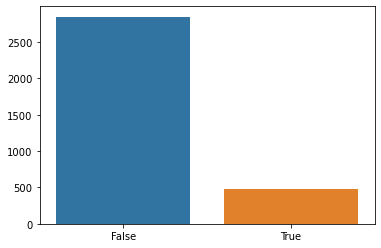

In [9]:
y = df['churn'].value_counts()
sns.barplot(y.index, y.values);

In [10]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

False means that the customers did not leave SyriaTel, while true means that they did.
So about 85.51 % stayed with SyriaTel while 14.49% have left.

# Data Exploration

We will look at three categorical variables and the area code and compare them with the churn data set. These three categorical variables are:
- 'state'
- 'international plan'
- 'voice mail plan'

- 'area code' (not categorical)

## Churn by State

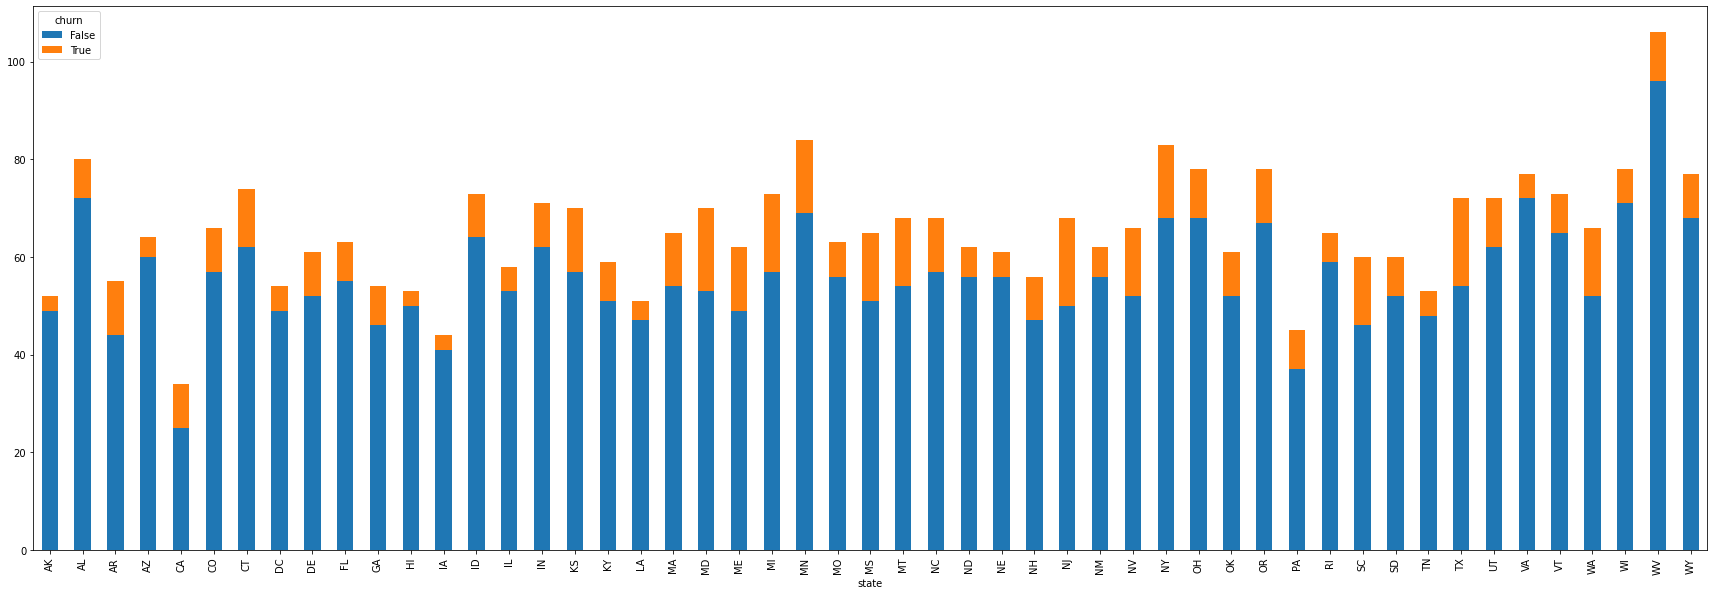

In [12]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10));

In [16]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
MT     68
NJ     68
NV     66
CO     66
WA     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [23]:
df.loc[df['churn'] == False, 'state'].value_counts()

WV    96
AL    72
VA    72
WI    71
MN    69
WY    68
OH    68
NY    68
OR    67
VT    65
ID    64
CT    62
IN    62
UT    62
AZ    60
RI    59
KS    57
CO    57
MI    57
NC    57
NM    56
ND    56
MO    56
NE    56
FL    55
TX    54
MA    54
MT    54
IL    53
MD    53
NV    52
WA    52
DE    52
OK    52
SD    52
KY    51
MS    51
NJ    50
HI    50
ME    49
DC    49
AK    49
TN    48
NH    47
LA    47
GA    46
SC    46
AR    44
IA    41
PA    37
CA    25
Name: state, dtype: int64

In [22]:
df.loc[df['churn'] == True, 'state'].value_counts()

NJ    18
TX    18
MD    17
MI    16
NY    15
MN    15
SC    14
NV    14
WA    14
MT    14
MS    14
ME    13
KS    13
CT    12
AR    11
NC    11
OR    11
MA    11
OH    10
UT    10
WV    10
CO     9
WY     9
NH     9
IN     9
CA     9
DE     9
ID     9
OK     9
AL     8
VT     8
GA     8
SD     8
PA     8
FL     8
KY     8
MO     7
WI     7
NM     6
ND     6
RI     6
VA     5
NE     5
DC     5
TN     5
IL     5
LA     4
AZ     4
AK     3
HI     3
IA     3
Name: state, dtype: int64

In [32]:
churn_by_state = df.groupby(['state', 'churn'])['state'].count().unstack()
percent_churn_by_state = churn_by_state[True] / churn_by_state.sum(axis=1) * 100
percent_not_churn_by_state = churn_by_state[False] / churn_by_state.sum(axis=1) * 100

In [33]:
percent_not_churn_by_state

state
AK    94.230769
AL    90.000000
AR    80.000000
AZ    93.750000
CA    73.529412
CO    86.363636
CT    83.783784
DC    90.740741
DE    85.245902
FL    87.301587
GA    85.185185
HI    94.339623
IA    93.181818
ID    87.671233
IL    91.379310
IN    87.323944
KS    81.428571
KY    86.440678
LA    92.156863
MA    83.076923
MD    75.714286
ME    79.032258
MI    78.082192
MN    82.142857
MO    88.888889
MS    78.461538
MT    79.411765
NC    83.823529
ND    90.322581
NE    91.803279
NH    83.928571
NJ    73.529412
NM    90.322581
NV    78.787879
NY    81.927711
OH    87.179487
OK    85.245902
OR    85.897436
PA    82.222222
RI    90.769231
SC    76.666667
SD    86.666667
TN    90.566038
TX    75.000000
UT    86.111111
VA    93.506494
VT    89.041096
WA    78.787879
WI    91.025641
WV    90.566038
WY    88.311688
dtype: float64

In [31]:
percent_churn_by_state

state
AK     5.769231
AL    10.000000
AR    20.000000
AZ     6.250000
CA    26.470588
CO    13.636364
CT    16.216216
DC     9.259259
DE    14.754098
FL    12.698413
GA    14.814815
HI     5.660377
IA     6.818182
ID    12.328767
IL     8.620690
IN    12.676056
KS    18.571429
KY    13.559322
LA     7.843137
MA    16.923077
MD    24.285714
ME    20.967742
MI    21.917808
MN    17.857143
MO    11.111111
MS    21.538462
MT    20.588235
NC    16.176471
ND     9.677419
NE     8.196721
NH    16.071429
NJ    26.470588
NM     9.677419
NV    21.212121
NY    18.072289
OH    12.820513
OK    14.754098
OR    14.102564
PA    17.777778
RI     9.230769
SC    23.333333
SD    13.333333
TN     9.433962
TX    25.000000
UT    13.888889
VA     6.493506
VT    10.958904
WA    21.212121
WI     8.974359
WV     9.433962
WY    11.688312
dtype: float64

## Churn by International Plan

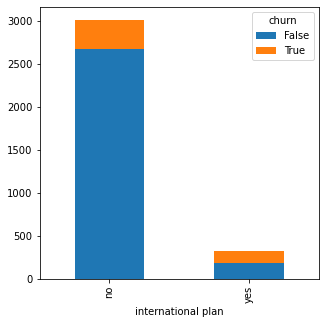

In [24]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5));

In [26]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [28]:
df.loc[df['churn'] == False, 'international plan'].value_counts()

no     2664
yes     186
Name: international plan, dtype: int64

In [29]:
df.loc[df['churn'] == True, 'international plan'].value_counts()

no     346
yes    137
Name: international plan, dtype: int64

In [34]:
churn_by_ip = df.groupby(['international plan', 'churn'])['international plan'].count().unstack()
percent_churn_by_ip = churn_by_ip[True] / churn_by_ip.sum(axis=1) * 100
percent_not_churn_by_ip = churn_by_ip[False] / churn_by_ip.sum(axis=1) * 100

In [38]:
percent_not_churn_by_ip

international plan
no     88.504983
yes    57.585139
dtype: float64

In [39]:
percent_churn_by_ip

international plan
no     11.495017
yes    42.414861
dtype: float64

## Churn by Customers with Voice Mail Plan

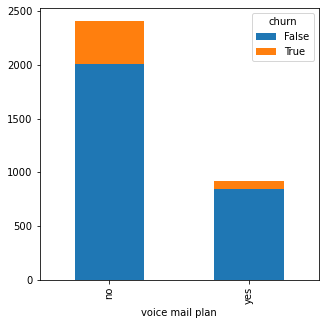

In [40]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5));

In [41]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [42]:
df.loc[df['churn'] == False, 'voice mail plan'].value_counts()

no     2008
yes     842
Name: voice mail plan, dtype: int64

In [43]:
df.loc[df['churn'] == True, 'voice mail plan'].value_counts()

no     403
yes     80
Name: voice mail plan, dtype: int64

In [44]:
churn_by_vmp = df.groupby(['voice mail plan', 'churn'])['voice mail plan'].count().unstack()
percent_churn_by_vmp = churn_by_vmp[True] / churn_by_vmp.sum(axis=1) * 100
percent_not_churn_by_vmp = churn_by_vmp[False] / churn_by_vmp.sum(axis=1) * 100

In [45]:
percent_not_churn_by_vmp

voice mail plan
no     83.284944
yes    91.323210
dtype: float64

In [46]:
percent_churn_by_vmp

voice mail plan
no     16.715056
yes     8.676790
dtype: float64

## Churn by Area Code

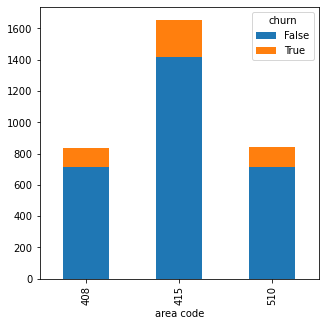

In [14]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5));

In [47]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [48]:
df.loc[df['churn'] == False, 'area code'].value_counts()

415    1419
408     716
510     715
Name: area code, dtype: int64

In [49]:
df.loc[df['churn'] == True, 'area code'].value_counts()

415    236
510    125
408    122
Name: area code, dtype: int64

In [50]:
churn_by_ac = df.groupby(['area code', 'churn'])['area code'].count().unstack()
percent_churn_by_ac = churn_by_ac[True] / churn_by_ac.sum(axis=1) * 100
percent_not_churn_by_ac = churn_by_ac[False] / churn_by_ac.sum(axis=1) * 100

In [51]:
percent_not_churn_by_ac

area code
408    85.441527
415    85.740181
510    85.119048
dtype: float64

In [52]:
percent_churn_by_ac

area code
408    14.558473
415    14.259819
510    14.880952
dtype: float64

## Churn by Numeric Variables

In [59]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

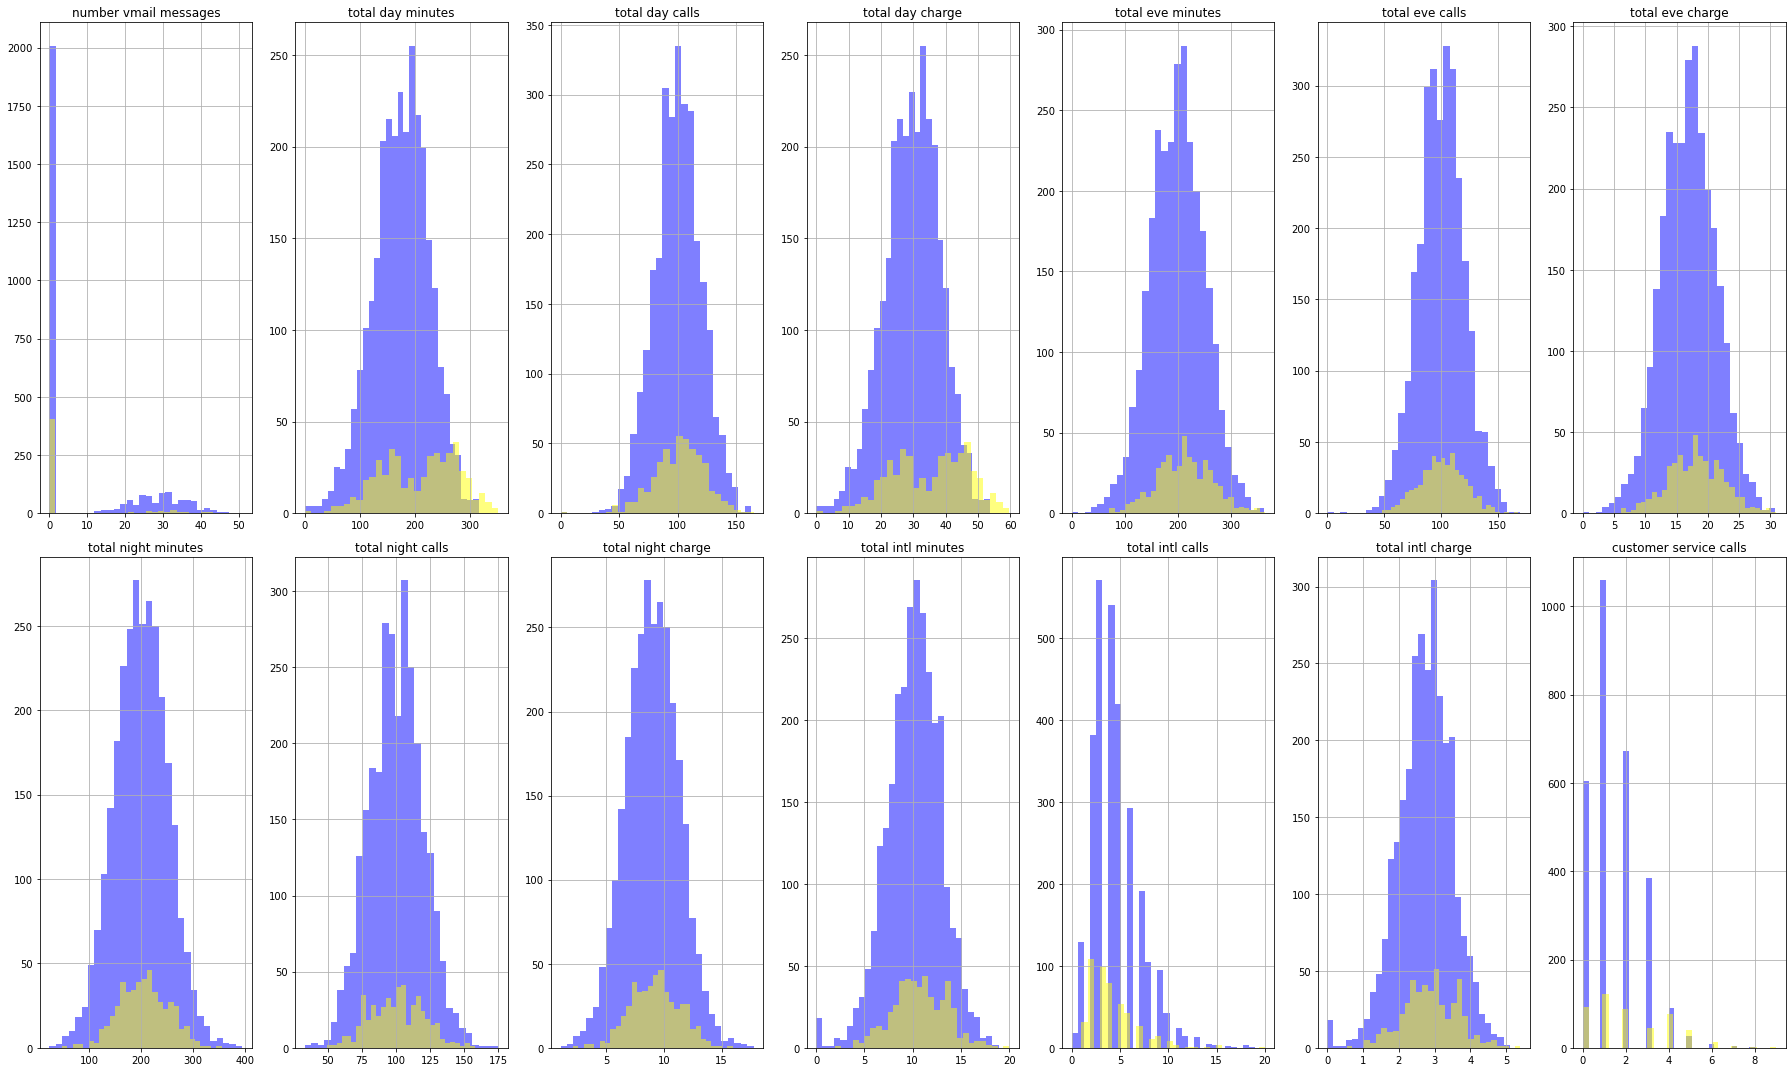

In [70]:
pred_vars = ['number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 
             'total eve minutes', 'total eve calls', 'total eve charge',
             'total night minutes', 'total night calls', 'total night charge', 
             'total intl minutes', 'total intl calls', 'total intl charge', 
             'customer service calls']

fig, ax = plt.subplots(2, 7, figsize=(25, 15))
df[df.churn == False][pred_vars].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.churn == True][pred_vars].hist(bins=30, color="yellow", alpha=0.5, ax=ax)
plt.tight_layout()
plt.show()

From these plots, you can gather the following information:

- For the 'number vmail messages' variable, you can see that non-churned customers tend to have a higher number of voicemail messages, while churned customers tend to have a lower number. This suggests that having voicemail may be a factor that contributes to customer retention.

- For the 'total day minutes', 'total eve minutes', and 'total night minutes' variables, you can see that churned customers tend to have higher total minutes than non-churned customers. This suggests that customers who use the service more may be more likely to churn.

- For the 'total day calls', 'total eve calls', and 'total night calls' variables, you can see that the distribution of calls is similar for churned and non-churned customers, with a peak around 100 calls. This suggests that the number of calls may not be a significant factor in customer churn.

- For the 'total day charge', 'total eve charge', and 'total night charge' variables, you can see that churned customers tend to have higher charges than non-churned customers. This suggests that customers who incur higher charges may be more likely to churn.

- For the 'total intl minutes', 'total intl calls', and 'total intl charge' variables, you can see that there are relatively few customers who use international services, and the distribution of these variables is similar for churned and non-churned customers. This suggests that international services may not be a significant factor in customer churn.

- For the 'customer service calls' variable, you can see that churned customers tend to have a higher number of customer service calls than non-churned customers. This suggests that customer service may be a factor that contributes to customer retention, and that customers who have a higher number of service calls may be more likely to churn.

# Numeric Variables Colinearity

In [87]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df_num = df[['number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 
             'total eve minutes', 'total eve calls', 'total eve charge',
             'total night minutes', 'total night calls', 'total night charge', 
             'total intl minutes', 'total intl calls', 'total intl charge', 
             'customer service calls']]

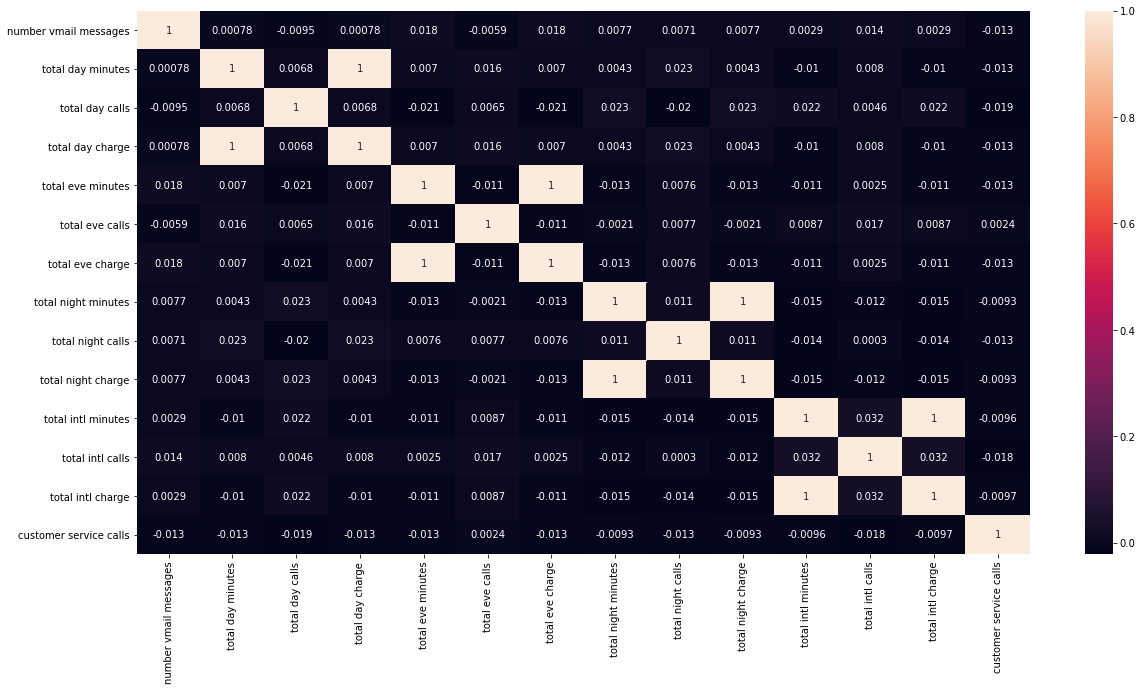

In [92]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_num.corr(),annot = True)
plt.show();

# Handle Categorical Columns: LabelEncoder

In [93]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [94]:
# LabelEncodert object
le = LabelEncoder()

In [95]:
# Convert object columns to integer columns using LabelEncoder
df['state'] = le.fit_transform(df['state'])
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])

In [96]:
# change from int32 to int64
df['state'] = df['state'].astype('int64')
df['international plan'] = df['international plan'].astype('int64')
df['voice mail plan'] = df['voice mail plan'].astype('int64')
df['churn'] = df['churn'].astype('int64')

In [97]:
df.dtypes

state                       int64
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [98]:
df.shape

(3333, 21)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- train test split
- logistic regression
- decision tree
- tune hyperparameters

# Train-Test-Split


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X = df.drop(['phone number', 'churn', 'state', 'area code'], axis=1)
y = df['churn']

In [111]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                   random_state=1)

# Logistic Regression

In [184]:
# import cross-validation and logistic regression code
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve, confusion_matrix, plot_confusion_matrix, classification_report

In [126]:
# define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [127]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [163]:
pipeline.score(X_train, y_train)

0.8647458983593438

In [161]:
pipeline.score(X_train, y_train) * 100

86.47458983593438

In [169]:
y_pred1 = pipeline.predict(X_test)

In [172]:
cm_1 = confusion_matrix(y_test, y_pred1)
cm_1

array([[689,  23],
       [100,  22]], dtype=int64)

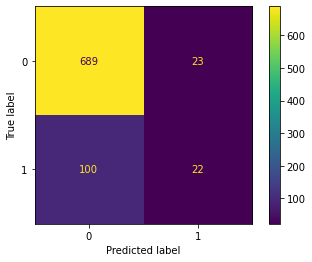

In [173]:
# More visual representation
plot_confusion_matrix(pipeline, X_test, y_test);

In [185]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       712
           1       0.49      0.18      0.26       122

    accuracy                           0.85       834
   macro avg       0.68      0.57      0.59       834
weighted avg       0.82      0.85      0.82       834



# Cross-Validate Logistic Regression

In [209]:
cv_results1 = cross_validate(
                    estimator=pipeline,
                    X=X_train,
                    y=y_train,
                    cv=5,
                    return_train_score=True
)

In [210]:
cv_results1['train_score']

array([0.86793397, 0.86393197, 0.86393197, 0.86343172, 0.8675    ])

In [211]:
cv_results1['test_score']

array([0.852     , 0.868     , 0.868     , 0.866     , 0.86973948])

In [212]:
def cv_overall(cv_results1):
    val_results = cv_results1['test_score']
    result_str = f'{val_results.mean():.3f} ± {val_results.std():.3f}'
    return result_str

In [213]:
cv_overall(cv_results1)

'0.865 ± 0.006'

In [224]:
# Let's save these results for later
models = {}

models['model_1'] = {'model': pipeline, 'cv':cv_results1}

# Decision Tree

In [192]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline

In [193]:
# run DecisionTree Classifier
df_dt = DecisionTreeClassifier(random_state=1, max_depth=3)

#fit
df_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [196]:
y_pred2 = df_dt.predict(X_test)

In [235]:
cm_2 = confusion_matrix(y_test, y_pred2)
cm_2

array([[680,  32],
       [ 66,  56]], dtype=int64)

In [197]:
acc = accuracy_score(y_test, y_pred2) * 100
acc

88.2494004796163

In [198]:
df_dt.score(X_test, y_test) * 100

88.2494004796163

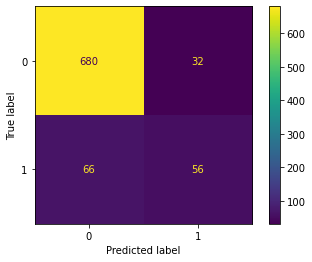

In [199]:
plot_confusion_matrix(df_dt, X_test, y_test);

In [208]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       712
           1       0.64      0.46      0.53       122

    accuracy                           0.88       834
   macro avg       0.77      0.71      0.73       834
weighted avg       0.87      0.88      0.87       834



In [200]:
np.bincount(y_train)

array([2138,  361], dtype=int64)

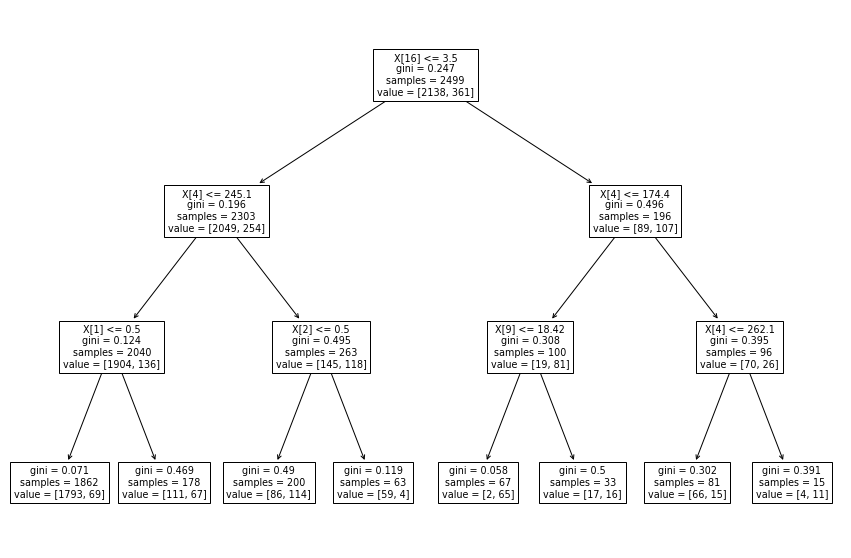

In [201]:
f, ax = plt.subplots(figsize=(15, 10))
plot_tree(df_dt, ax=ax);

# Cross-Validate Decision Tree

In [218]:
cv_results2 = cross_validate(
                    estimator=df_dt,
                    X=X_train,
                    y=y_train,
                    cv=5,
                    return_train_score=True
)

In [219]:
cv_results2['train_score']

array([0.89994997, 0.90645323, 0.90595298, 0.90645323, 0.9055    ])

In [220]:
cv_results2['test_score']

array([0.882     , 0.922     , 0.892     , 0.872     , 0.91983968])

In [221]:
def cv_overall(cv_results2):
    val_results = cv_results2['test_score']
    result_str = f'{val_results.mean():.3f} ± {val_results.std():.3f}'
    return result_str

In [222]:
cv_overall(cv_results2)

'0.898 ± 0.020'

In [223]:
models = {}

models['model_2'] = {'model': df_dt, 'cv':cv_results2}

# KNN Model

In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [225]:
knn_model.score(X_train, y_train)

0.8935574229691877

In [226]:
knn_model.score(X_train, y_train) * 100

89.35574229691878

In [231]:
y_pred3 = knn_model.predict(X_test)

In [233]:
cm_3 = confusion_matrix(y_test, y_pred3)
cm_3

array([[694,  18],
       [ 87,  35]], dtype=int64)

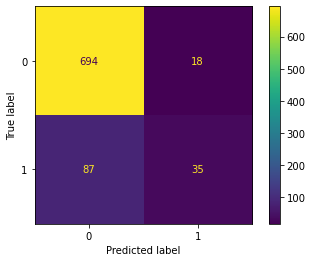

In [234]:
# More visual representation
plot_confusion_matrix(knn_model, X_test, y_test);